In [1]:
using Revise
#using Plots
using GLMakie
using JLD2

pathBase = joinpath(@__DIR__, "../src/")


includet(pathBase * "RLEnvironment.jl")
includet(pathBase * "RLExperiment.jl")
includet(pathBase * "Visualization.jl")

includet(pathBase * "Training.jl")
includet(pathBase * "Misc.jl")
includet(pathBase * "SharedStructs.jl")
using .SharedStructs

In [35]:
# set default parameters
parameters = Dict(

## physics / lattice parameters
"Nx" => 200, # number of grid points
"Ny" => 200,
"ndt" => 25, # number of dt to integrate in one RL step
"bc" => "pbc", # boundary conditions
"lambdaBE" => 0.7, # flow-alignment coupling parameter
"A0BE" => 0.1, # strength of polarization terms in free energy
"UBE" => 3.5, # sets the equilibrium polarization
"LBE" => 0.1, # strength of gradient term in free energy
"GammaBE" => 1.0, # rotation diffusion constant
"friction" => 10, # subtrate friction term

"offX" => 50, # half of initial x separation between defects  
"offY" => 0,
"q" => 0.1, # overall rotation of nematic field in initial configuration
"randParam" => 0.1,

"plusTweezerParams" => Dict(
        "c0" => 8,
        "cxx" => 0,
        "cyy" => 0,
        "width" => 5.0,
        "cutoff" => 2
        ), 
        
"minusTweezerParams" => Dict(
        "c0" => 8,
        "cxx" => 0,
        "cyy" => 0,
        "width" => 5.0,
        "cutoff" => 2
        ),

## parameters of the imposed force law 
"ks" => 0.01, # stiffness times the drag
"l0" => 70, # equilibrium separation
"kt" => 0.025,

## parameters of the Environment object
"nSteps" => 50, # number of steps in one episode
"bounds" => [15, 7, 0*pi/4], # range of allowed increments of the activityCoefficients
"taskMarker" => "orbit",
"rewP" => 0, # strength of the penalty used to compute the reward
"rewT" => 5,
"updateOncePerStepBool" => true, # whether to update agents and activityField each step (true) or each dt (false), for efficiency
    
## parameters of the Experiment object
"seed" => 10, # random seed for network initialization
"eps_or_hrs" => "eps", # terminate after nEpisodes epsiodes ("eps") or nEpisodes hours ("hrs")
"envMarker" => "nem",
"nEpisodes" => 1, # number of episodes / hours
"stepStride" => 1,
"episodeStride" => 1,
"stateTrajStride" => 1,
"batchSize" => 128, # how many samples to include in replay buffer used to train the networks
"updateFreq" => 10, # how many steps to do before updating the network parameters 
"netLayers" => 1,
"netWidth" => 32,
"gamma" => 0.99f0, 
"rho" => 0.9995f0,
    
"act_limit" => 1.0,
"act_noise" => 0e-1,
"annealBool" => false,
"annealTime" => 250,

## restart parameters
"restartBool" => false, # whether to load experiment from a previous SavedData file or not 
"parentDirectoryName" => "Dirs_ks_cutoff", # the name of the parent folder containing all the param trials
"restartLabel" => "_R" # the label which has been appended to parentDirectoryName directory manually by the user
);
println("Done.")

Done.


In [36]:
ex = InitializeAndRunExperiment(parameters)

# Nematic defect RL with DDPG


# Nematic defect RL with DDPG


typename(Experiment)
├─ policy => typename(Agent)
│  ├─ policy => typename(DDPGPolicy)
│  │  ├─ behavior_actor => typename(NeuralNetworkApproximator)
│  │  │  ├─ model => typename(Chain)
│  │  │  │  └─ layers
│  │  │  │     ├─ 1
│  │  │  │     │  └─ typename(Dense)
│  │  │  │     │     ├─ weight => 32×2 Matrix{Float32}
│  │  │  │     │     ├─ bias => 32-element Vector{Float32}
│  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │     ├─ 2
│  │  │  │     │  └─ typename(Dense)
│  │  │  │     │     ├─ weight => 32×32 Matrix{Float32}
│  │  │  │     │     ├─ bias => 32-element Vector{Float32}
│  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │     └─ 3
│  │  │  │        └─ typename(Dense)
│  │  │  │           ├─ weight => 3×32 Matrix{Float32}
│  │  │  │           ├─ bias => 3-element Vector{Float32}
│  │  │  │           └─ σ => typename(typeof(identity))
│  │  │  └─ optimizer => typename(Flux.Optimise.Optimiser)
│  │  │     └─ os => 2-element Vector{Any}
│  │  ├─ behavio

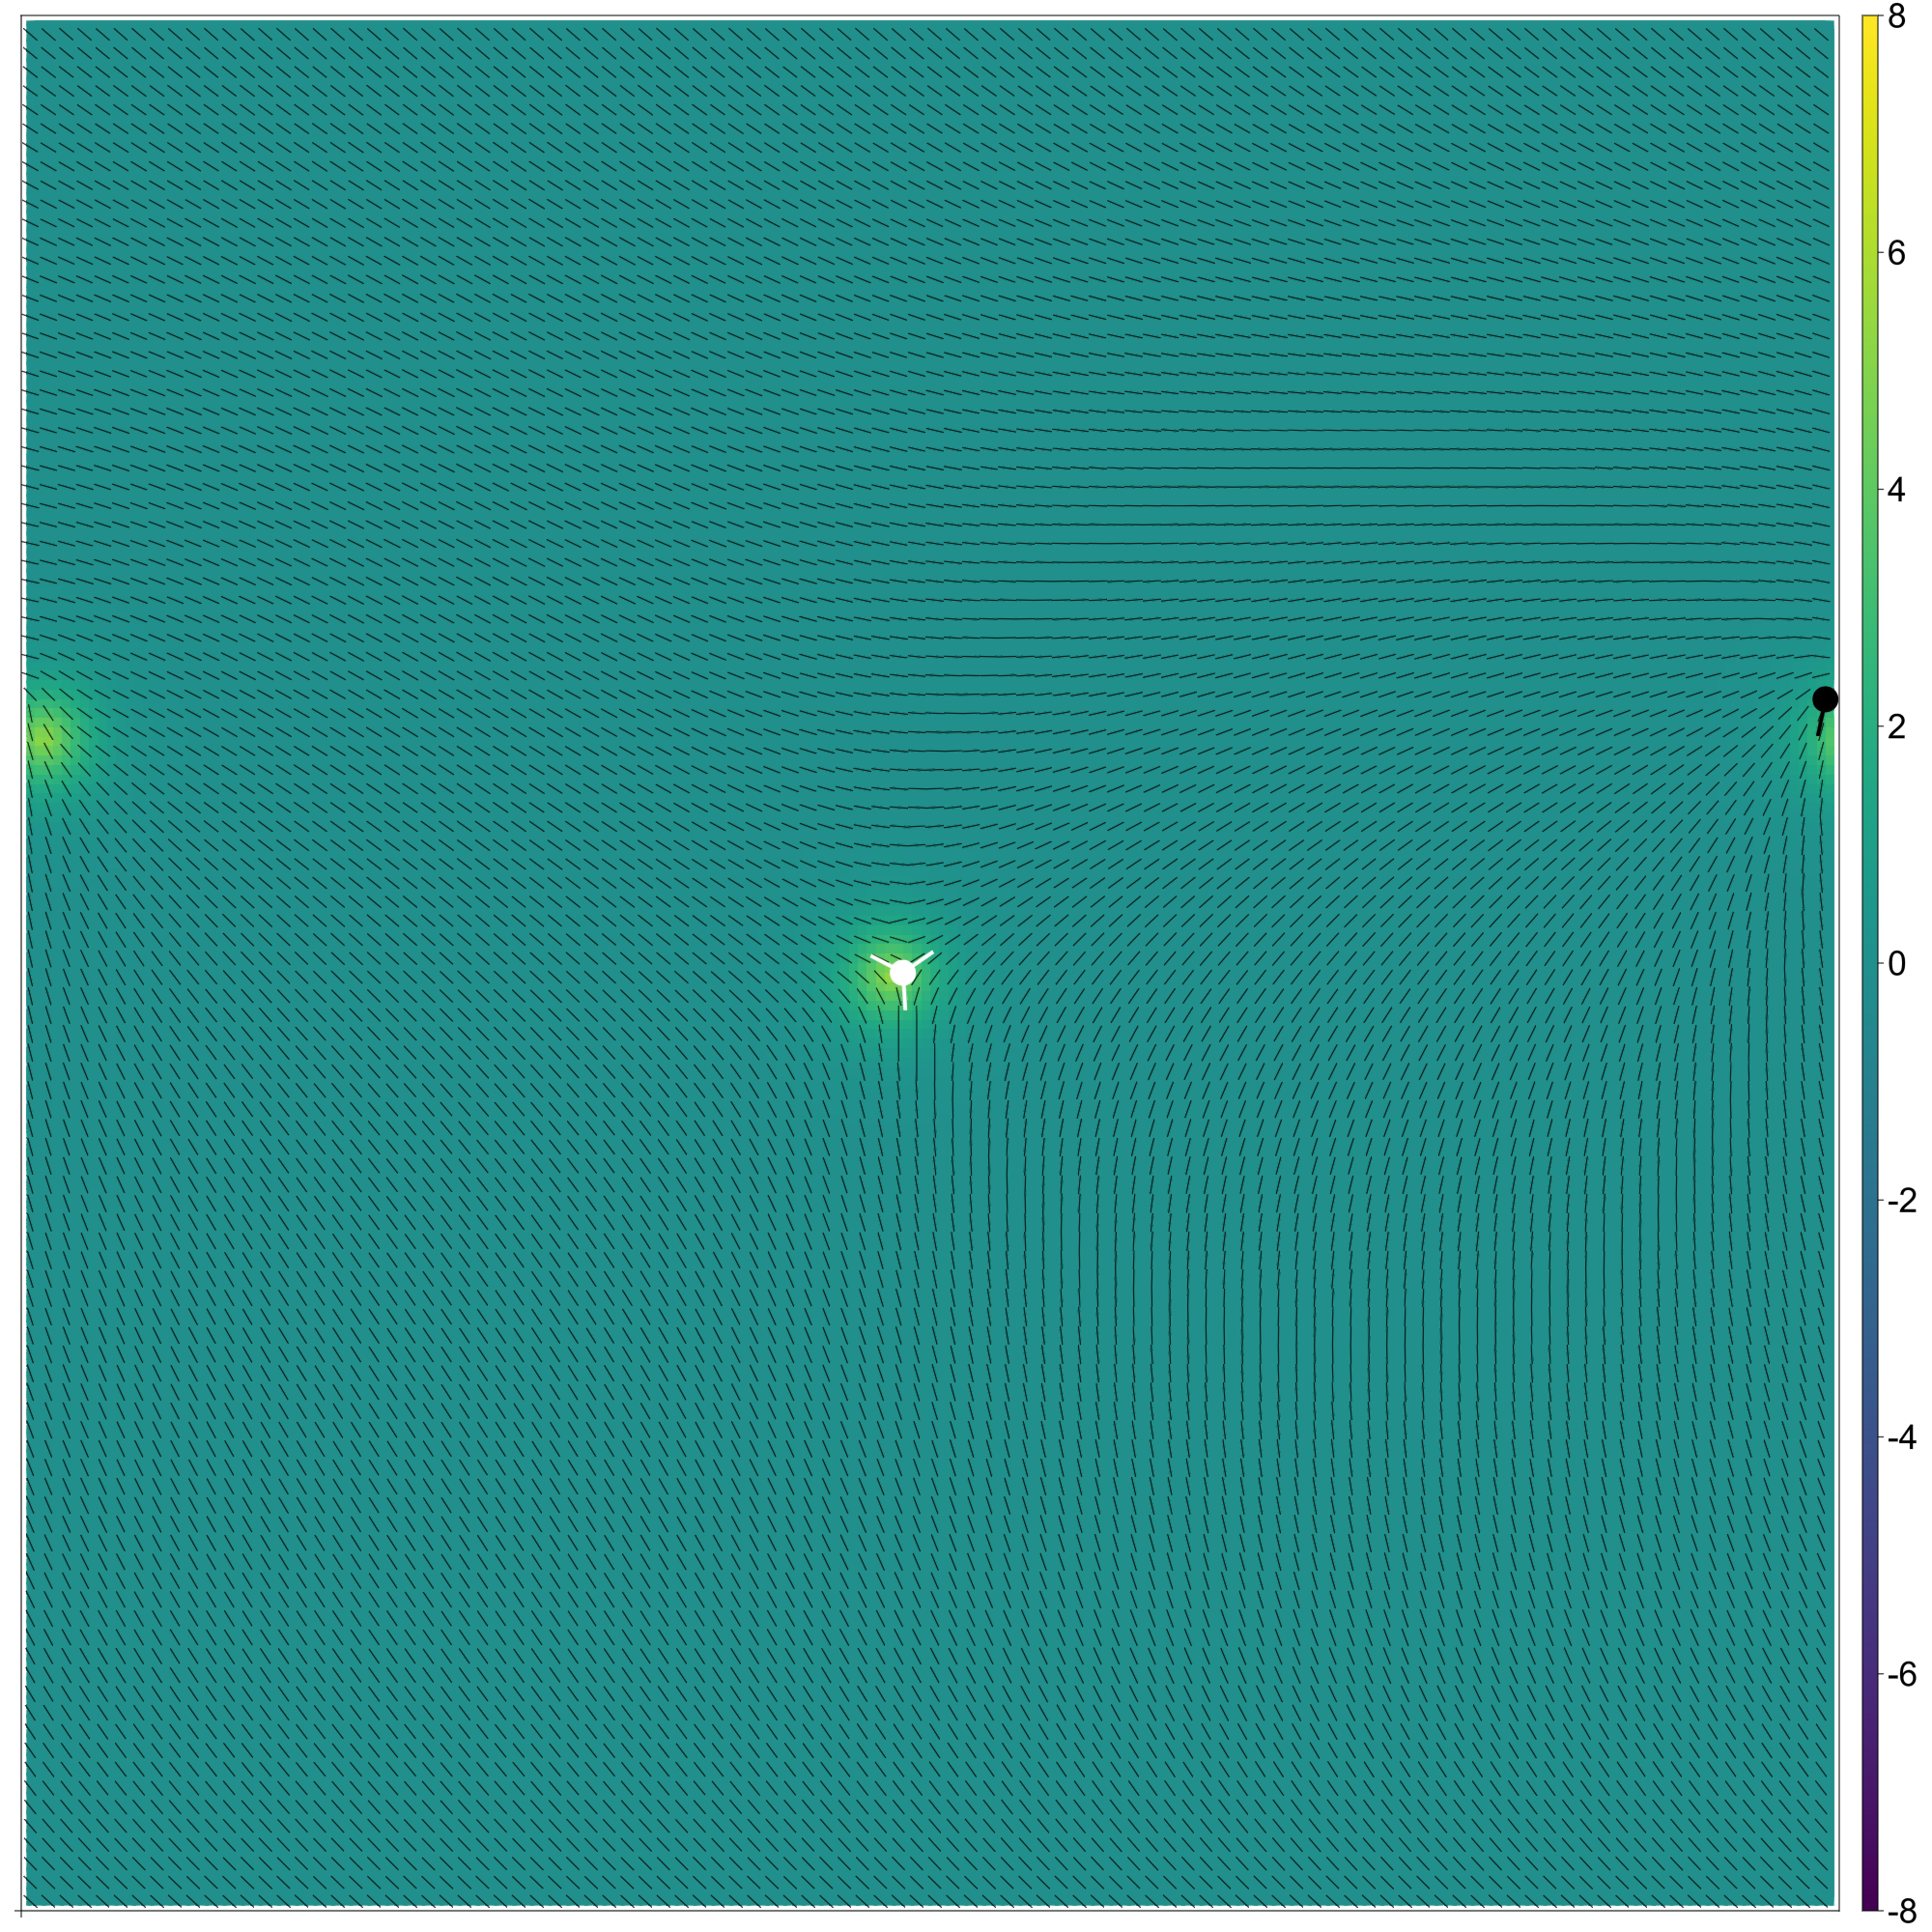

┌ Warning: Unsupported marker: square, using ● instead
└ @ Makie C:\Users\csfloyd\.julia\packages\Makie\LCBYx\src\conversions.jl:1260
┌ Warning: Unsupported marker: square, using ● instead
└ @ Makie C:\Users\csfloyd\.julia\packages\Makie\LCBYx\src\conversions.jl:1260


In [38]:
## save full figure 

t = 50
exc = 1e-1
cr = (-0e-3, 2e-3)
cr = (-8, 8)
parameters["dx"] = 1
parameters["bcBE_X"] = "pbc"
parameters["bcBE_Y"] = "pbc"
imagePath = "/Users/csfloyd/Dropbox/Projects/CatchHopfield/VEInstability/Figures/None.png"

sS = ex.hook.stateTrajList[1][t]

Visualization.StaticArrows(1, parameters,  [sS.velocitySoA], [sS.nematicSoA], [sS.activityField], [ex.env.sS.agentHandler];
        arrows = "nem", defects = "Q", col = "act", arrowFac = 2e0, arrowSkip = 2, arrowHead = 0, markersize = 50,
        colorrange = cr, recording = false, imagePath = imagePath, res = 2000, cScaleFac = 1)


In [59]:
ex.hook.episodeList[1].rewards

11-element Vector{Real}:
 -0.9234884706593012
 -0.9088769308594986
 -1.0234826460780002
 -0.6446848628553288
 -1.5482915835136206
 -0.7519960000568422
 -0.524240646439904
 -0.7636489274784712
 -0.7258693462432828
 -0.5119880934787842
 -0.5334682482330568

In [36]:
minimum(ex.env.sS.activityField.Values)

0.0

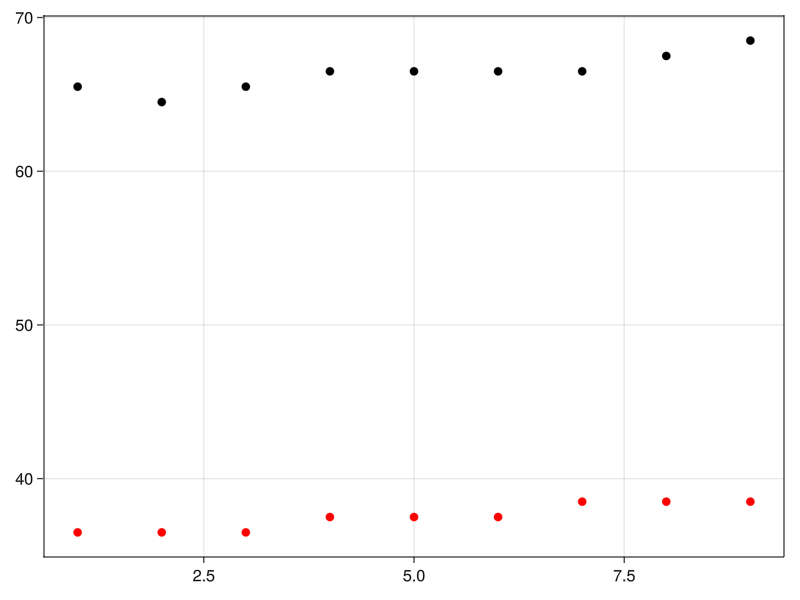

In [19]:
hookResults = ex.hook.episodeList;

ep = 4
tMax = length(hookResults[ep].agentHandlerList)
tMax = 9
Makie.scatter([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] for t in 1:tMax] , color = :black)
Makie.scatter!([hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:tMax] , color = :red)
current_figure()

In [51]:
ex.env.sS.agentHandler.PlusDefects[1].activityCoefficients
ex.env.sS.agentHandler.MinusDefects[1].activityCoefficients

Main.SimMain.Training.ActivityCoefficients(0.0, 0.0, 0.22847824678672946, 0.007615941559557649, 0.0, 0.0010745546487197796, 0.0, 0.0, 7.5, 2)

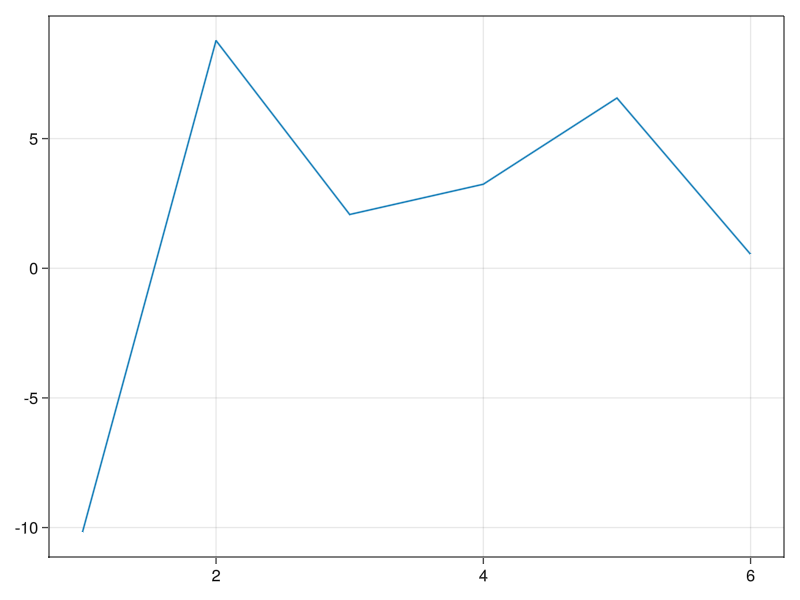

In [98]:
Makie.lines([
        hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] -
        hookResults[ep].agentHandlerList[t].PlusDefects[1].activityCoefficients.r0x
        for t in 1:6
        ])

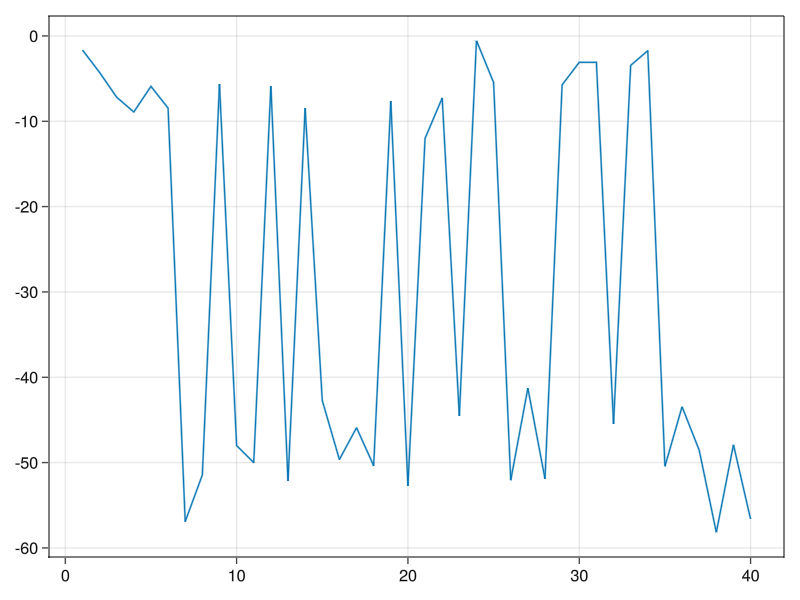

In [99]:
Makie.lines([sum(hookResults[ep].rewards[1:end-1]) / length(hookResults[ep].rewards)  for ep in 1:length(hookResults)])


current_figure()

length((hookResults[ep]).rewards) = 11
3.556290470917411
3.556290470917411
Real[67.5, 50.5]
Main.SimMain.Training.ActivityCoefficients(76.16445795016604, 50.5, 6, 0.0, 0.0, -0.05, -0.05, 0.0, 2, 7.5)
Real[38.5, 50.5]
Main.SimMain.Training.ActivityCoefficients(47.07460946813596, 50.5, 6, 0.0, 0.0, -0.05, -0.05, 0.0, 2, 7.5)


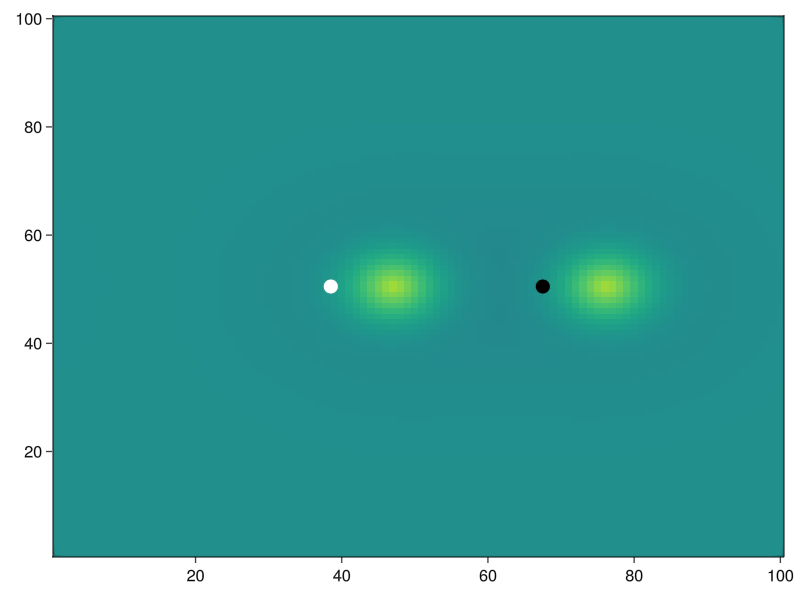

In [23]:
myGrid = Grid2D(parameters["Nx"], parameters["Ny"], 1)
activityField = ScalarSoA2D(myGrid)
ep = 4
step = 10#length(hookResults[ep].agentHandlerList) - 2
@show length(hookResults[ep].rewards)
agentHandler = deepcopy(hookResults[ep].agentHandlerList[step])
Training.SetActivityFieldFromAgents!(myGrid, activityField, agentHandler, parameters["bc"], parameters["bc"], false)

exc = 5e-0
Makie.heatmap(activityField.Values, colorrange = (-exc, exc))
println(maximum(abs.(activityField.Values)))

# println(Analysis.Distance(hookResults[ep].agentHandlerList[step].PlusDefects[1].Position,
#             hookResults[ep].agentHandlerList[step].MinusDefects[1].Position))
println(maximum(abs.(activityField.Values)))

println(agentHandler.PlusDefects[1].Position)
println(agentHandler.PlusDefects[1].activityCoefficients)

println(agentHandler.MinusDefects[1].Position)
println(agentHandler.MinusDefects[1].activityCoefficients)

xsp = agentHandler.PlusDefects[1].Position[1]
ysp = agentHandler.PlusDefects[1].Position[2]
xsm = agentHandler.MinusDefects[1].Position[1]
ysm = agentHandler.MinusDefects[1].Position[2]

Makie.scatter!(xsp, ysp, markersize = 20, marker = :circle, color = :black)
Makie.scatter!(xsm, ysm, markersize = 20, marker = :circle, color = :white)
Makie.current_figure()

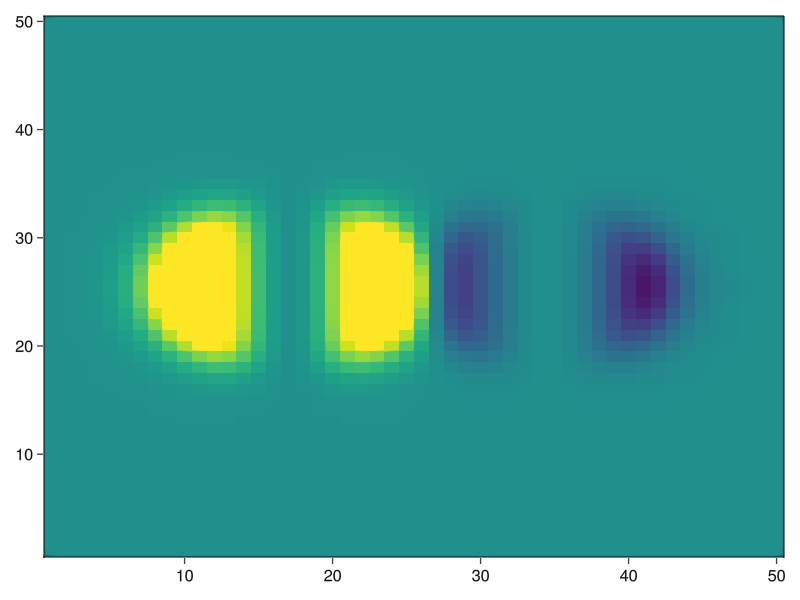

In [55]:
Makie.heatmap(ex.env.sS.activityField.Values, colorrange = (-2,2))



In [2]:
testPath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Test/SavedData.jld2"
d = load(testPath)

# Nematic defect RL with MADDPG


Dict{String, Any} with 2 entries:
  "parameters" => Dict{String, Any}("lambdaBE"=>0.7, "ndt"=>25, "UBE"=>3.5, "bc…
  "ex"         => typename(Experiment)…

In [3]:
newEx = d["ex"]

# Nematic defect RL with MADDPG


typename(Experiment)
├─ policy => typename(MADDPGManager)
│  ├─ agents => typename(Dict)
│  ├─ traces
│  │  ├─ 1
│  │  │  └─ state
│  │  ├─ 2
│  │  │  └─ action
│  │  ├─ 3
│  │  │  └─ reward
│  │  ├─ 4
│  │  │  └─ terminal
│  │  └─ 5
│  │     └─ next_state
│  ├─ batch_size => 128
│  ├─ update_freq => 1
│  ├─ update_step => 600
│  └─ rng => typename(StableRNGs.LehmerRNG)
├─ env => typename(NematicEnv)
├─ stop_condition => typename(StopAfterEpisode)
│  ├─ episode => 50
│  ├─ cur => 50
│  └─ progress => typename(ProgressMeter.Progress)
├─ hook => typename(RLNematicHook)
│  ├─ episodeList => 10-element Vector{EpisodeInformation}
│  ├─ storingBool => false
│  ├─ stepStride => 1
│  ├─ stepCount => 11
│  ├─ episodeStride => 5
│  └─ episodeCount => 50
└─ description => "# Nematic defect RL with MADDPG"


s1 = "/Dirs_test_alpha/test_1/alpha_1"
s2 = "/Dirs_test_alpha_R1/test_1/alpha_1"


"/Dirs_test_alpha_R1/test_1/alpha_1"

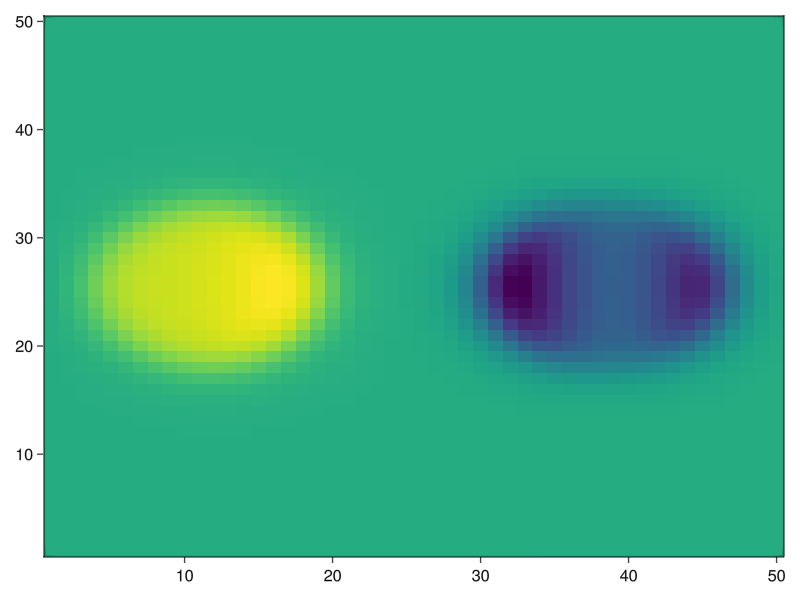

In [52]:
myGrid = Grid2D(parameters["Nx"], parameters["Ny"],1)
activityField = ScalarSoA2D(myGrid)
agentHandler = deepcopy(ex.hook.episodeList[end].agentHandlerList[end])
Training.SetActivityFieldFromAgents!(myGrid, activityField, agentHandler, parameters["bc"], parameters["bc"])


Makie.heatmap(activityField.Values)

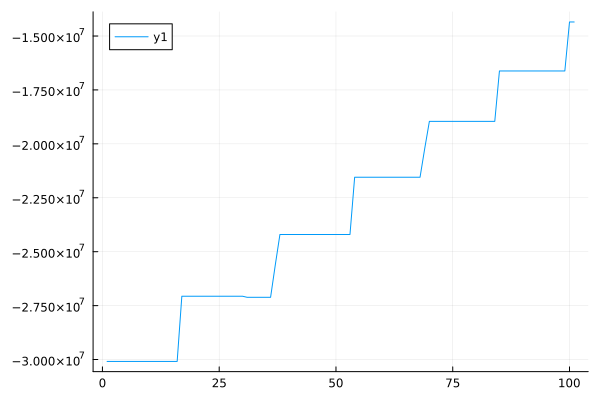

In [26]:
Plots.plot(ex.hook.episodeList[end].rewards)

In [75]:
ex.hook.episodeList[8].initParams

3-element Vector{Real}:
 13.205854373254436
 12.183658468273673
  0.0

In [53]:
ex.hook.episodeList[6].initParams

3-element Vector{Real}:
 13.968035717561964
 11.281191536005672
  0.0

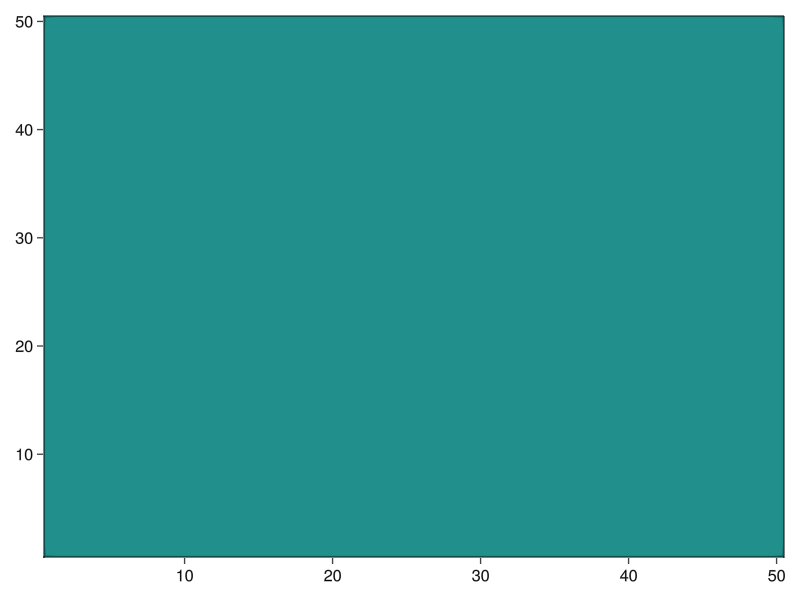

In [7]:
Makie.heatmap(env.sS.activityField.Values)

In [91]:
includet(pathBase * "Analysis.jl")
includet(pathBase * "SharedStructs.jl")
grid = SharedStructs.Grid2D(Nx, Ny, 1)
(xsp, ysp, xsm, ysm) = Analysis.GetNematicDefects(grid, env.sS.nematicSoA)

([12.5, 11.5], [38.5, 39.5], [38.5, 11.5], [13.5, 38.5])

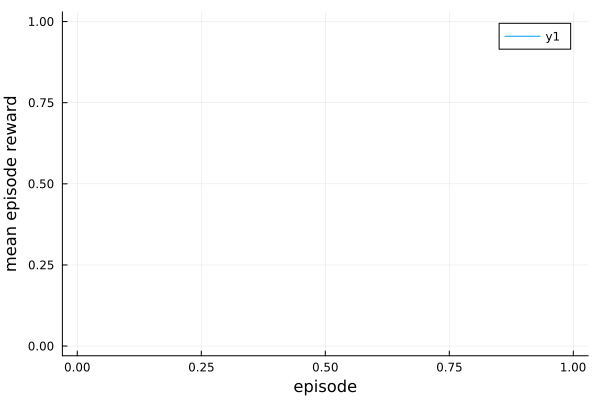

In [19]:
Plots.plot(ex.hook.episodes, ex.hook.mean_rewards, xlabel="episode", ylabel="mean episode reward")

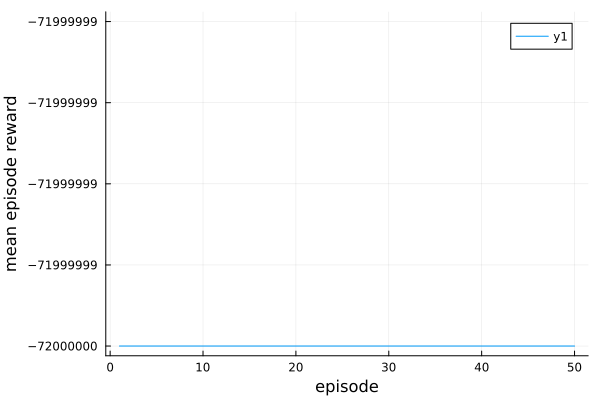

In [5]:
Plots.plot(ex.hook.rewards, xlabel="episode", ylabel="mean episode reward")

In [6]:
ex.hook.rewards

50-element Vector{Real}:
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
  ⋮
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7
 -7.2e7

In [9]:
19863.458238 / 3600

5.517627288333333